## Kaggle Titanic Challenge
### Gustavo A. Verneck
2025

### About the challenge
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.


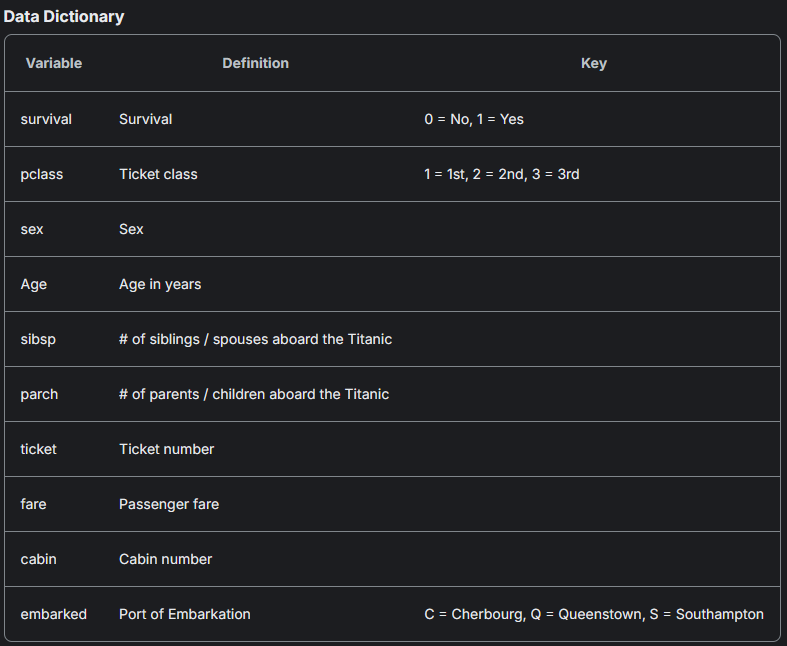

Variable Notes

*pclass*: A proxy for socio-economic status (SES): 1st = Upper, 2nd = Middle, 3rd = Lower

*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp*: The dataset defines family relations in this way...

*Sibling* = brother, sister, stepbrother, stepsister

*Spouse* = husband, wife (mistresses and fiancés were ignored)

*parch*: The dataset defines family relations in this way...

*Parent* = mother, father

*Child* = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [442]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

In [443]:
# Data directory
data_dir = "data"

# Files
train_data_file = "train.csv"
test_data_file = "test.csv"

In [444]:
# Import data
train_data = pd.read_csv(f"{data_dir}/{train_data_file}")
test_data = pd.read_csv(f"{data_dir}/{test_data_file}")

In [445]:
# Display data
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [446]:
# Overview of the train data
train_data.info()

# Number of NaN values in each column of train data
train_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [447]:
# Overview of the test data
test_data.info()

# Number of NaN values in each column of test data
test_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [448]:
# Number of unique entries in each column of train data
train_unique_counts = train_data.nunique()
print("Unique entries in train data:")
print(train_unique_counts)

# Number of unique entries in each column of test data
test_unique_counts = test_data.nunique()
print("\nUnique entries in test data:")

print(test_unique_counts)

Unique entries in train data:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Unique entries in test data:
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [449]:
# Drop irrelevant columns and save it in a new variable
data = train_data.drop_duplicates(inplace=False).drop(columns=["Name", "Ticket", "Cabin", "Embarked", "Fare", "SibSp", "Parch"], inplace=False)

In [450]:
# Fill missing values in the Age column with the mean of the column
data['Age'] = data["Age"].fillna(data['Age'].mean(), inplace=False)
data.dropna(inplace=True)

In [451]:
# Convert categorical data to numerical data
data = pd.get_dummies(data, drop_first=True).astype("float32")

In [452]:
# Normalize the Age column
scaler = MinMaxScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])

In [453]:
data.head()

,PassengerId,Survived,Pclass,Age,Sex_male
0,1.0,0.0,3.0,0.271174,1.0
1,2.0,1.0,1.0,0.472229,0.0
2,3.0,1.0,3.0,0.321438,0.0
3,4.0,1.0,1.0,0.434531,0.0
4,5.0,0.0,3.0,0.434531,1.0


In [454]:
# Correlation matrix
data.corr()
# It should be done before excluding the irrelevant columns, because it is important to know the correlation between the target variable and the other variables.

,PassengerId,Survived,Pclass,Age,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,0.084153
Sex_male,0.042939,-0.543351,0.131900,0.084153,1.000000


In [455]:
# Train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into features and target
X = data.drop(columns=["Survived", "PassengerId"], inplace=False)
y = data["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [456]:
# Predict the target values
y_pred = model.predict(X_test)

In [457]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


In [458]:
def clear_data(data):
    # Drop irrelevant columns and save it in a new variable
    data = data.drop(columns=["Name", "Ticket", "Cabin", "Embarked", "Fare", "SibSp", "Parch"], inplace=False)

    # Fill missing values in the Age column with the mean of the column
    data['Age'] = data["Age"].fillna(data['Age'].mean(), inplace=False)

    # Convert categorical data to numerical data
    data = pd.get_dummies(data.drop(columns=["PassengerId"]), drop_first=True).astype("float32")

    # Normalize the Age column
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data[["Age"]])

    return data


In [459]:
# Clear the test data
test_data_clean = clear_data(test_data)

test_data_clean.head()

,Pclass,Age,Sex_male
0,3.0,0.452723,1.0
1,3.0,0.617566,0.0
2,2.0,0.815377,1.0
3,3.0,0.353818,1.0
4,3.0,0.287881,0.0


In [461]:
# Predict the target values for the test data
test_data["Survived"] = model.predict(test_data_clean)

test_data["Survived"] = test_data["Survived"].astype(int)

# Save the results in a new CSV file
test_data[["PassengerId", "Survived"]].to_csv("results.csv", index=False)